In [115]:
#Загружаем файл 'bookings.csv',содержащий информацию о бронированиях в различных отелях в разное время и проанализируем основные процессы.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pylab inline
bookings = pd.read_csv('bookings.csv', sep = ';')
bookings_head = bookings.head(7)
bookings_head


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


1. Приведем  названия столбцов к стандартному виду - сложные названия через "_" и  используем только нижний регистр.

In [118]:
#bookings=bookings.rename(index = 'Is Canceled' : 'is_canceled')
def rename_columns_fun(name_column):
    name_column = name_column.lower()
    new_name = name_column.replace(' ', '_')
    return(new_name)
book = bookings.columns
bookings = bookings.rename(columns = rename_columns_fun)
bookings    

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,2,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,3,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07


2.Узнаем в  каких стран совершили наибольшее число успешных бронирований. Считаем бронирование успешным, если в дальнейшем оно не было отменено (переменная is_canceled).  И расмотрим топ 5 стран.

In [55]:
table = bookings.query('is_canceled == 0').country\
         .value_counts()[:5].reset_index().rename(columns ={ 'index' : 'country', 'country':'count'})
table

,country,count
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


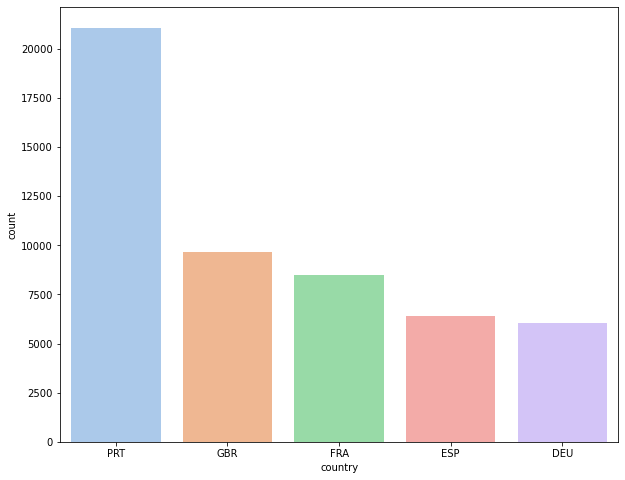

In [114]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'country', y = 'count', palette="pastel", data = table)
plt.show()

3. Рассмотрим на сколько ночей (stays_total_nights)  в среднем бронируют отели типа 'City Hotel' и  'Resort Hotel'.

In [31]:
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_full_date',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'stays_total_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [42]:
bookings.query('hotel == "City Hotel"')\
         .agg({'stays_total_nights' : 'mean'}).round(2)

stays_total_nights    2.98
dtype: float64

In [43]:
bookings.query('hotel == "Resort Hotel"')\
         .agg({'stays_total_nights' : 'mean'}).round(2)

stays_total_nights    4.32
dtype: float64

4.Бывает, что клиент получает  номер ('assigned_room_type'), не совпадающий с заявленным номером ('reserved_room_type') при 
бронировании. Посмотрим как часто это встречается в нашем датасете.

In [59]:
bookings.query('assigned_room_type != reserved_room_type').shape[0]

14917

5.Обратимся к датам прибытия ('arrival_date_year') и посмотрим в какой месяц 2016 года чаще всего оформляли бронь, и изменился
ли самый популярный месяц в 2017 году.

In [62]:
months_count = bookings.query('arrival_date_year == 2016')\
        .groupby('arrival_date_month')\
        .agg({'hotel' : 'count'})
months_count = months_count.reset_index().rename(columns = {'hotel':'count'})
months_count

,arrival_date_month,count
0,April,5428
1,August,5063
2,December,3860
3,February,3891
4,January,2248
5,July,4572
6,June,5292
7,March,4824
8,May,5478
9,November,4454


<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

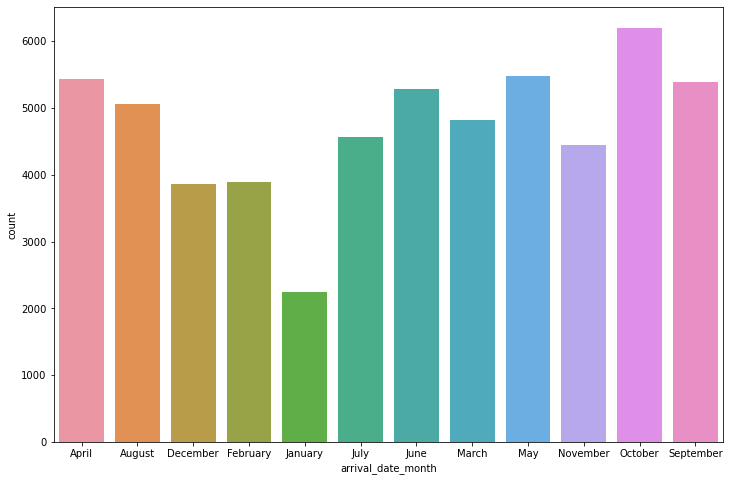

In [65]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'arrival_date_month', y = 'count', data = months_count)


In [65]:
bookings.query('arrival_date_year == 2017')\
        .groupby('arrival_date_month')\
        .agg({'hotel' : 'count'}).idxmax()

hotel    May
dtype: object

6. Теперь посмотрим проверьте, на какой месяц ('arrival_date_month') бронирования отеля типа 'City Hotel' 
отменялись чаще всего в 2015, 2016, 2017 годах.

In [70]:
bookings.query('is_canceled == 1 and hotel == "City Hotel"')\
        .groupby('arrival_date_year')\
         .arrival_date_month.value_counts()
         

arrival_date_year  arrival_date_month
2015               September             1543
                   October               1321
                   August                1232
                   July                   939
                   December               668
                   November               301
2016               October               1947
                   June                  1720
                   September             1567
                   April                 1539
                   May                   1436
                   November              1360
                   August                1247
                   March                 1108
                   December              1072
                   July                  1043
                   February               930
                   January                438
2017               May                   2217
                   April                 1926
                   June                  1

In [ ]:
7. Рассмотрим какого возраста постояльцев больше в нашей таблице, т.е. сравним числовые характеристики колонок:
    'adults, children,babies'.

In [73]:
cat_mean = bookings[['adults','children','babies']].mean().reset_index().rename(columns = {'index' : 'category', 0:'mean_value'})
cat_mean        

,category,mean_value
0,adults,1.856403
1,children,0.103890
2,babies,0.007949


<AxesSubplot:ylabel='mean_value'>

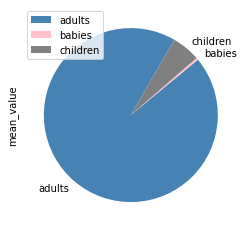

In [99]:
#Визуализируем для наглядности полученный результат:
colors = ["steelblue","pink","grey"]
cat_mean.groupby(['category']).mean().plot(kind='pie', y='mean_value', colors = colors,  startangle=60)

In [ ]:
8.  А теперь узнаем в каком отеле (в 'City hotel' или
'Resort hotel') в среднем больше всего детей. Детьми считаем  относящихся к колонкам 'children', и 'babies'.

In [18]:
bookings['total_kids'] = bookings.children + bookings.babies
bookings.groupby('hotel').agg({'total_kids': 'mean'}).round(2)

,total_kids
hotel,
City Hotel,0.10
Resort Hotel,0.14


Посчитаем метрику Churn rate, т.е. отношение количества пользователей, отменивших бронирование,
к общему количеству пользователей, выраженное в процентах. Рассмотрим как наличие детей у клиентов, влияет на отказ от бронирования.

In [39]:
#Здесь формируем запрос тех клиентов, у кого нет детей
bookings['has_kids'] = bookings.total_kids>=1
numerator_fk = bookings.query('is_canceled == 1 and has_kids == False').shape[0]
denominator_fk =bookings.query('has_kids == False').shape[0]
Churn_r_fk = round((numerator_fk/denominator_fk)*100,2)
Churn_r_fk

37.22

In [40]:
#Здесь формируем запрос тех, у кого имеются дети
numerator_tk=bookings.query('is_canceled == 1 and has_kids == True').shape[0]
denominator_tk =bookings.query('has_kids == True').shape[0]
Churn_r_tk = round((numerator_tk/denominator_tk)*100,2)
Churn_r_tk

34.92

Видим, что Churn rate у клиентов без детей выше.